## Clustering And Fitting ADS 

In [1732]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_samples, silhouette_score

In [1733]:
data = pd.read_csv('patient_dataset.csv')

data.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1


In [1734]:
# Handle missing values

data['gender'] = data['gender'].fillna(data['gender'].mode()[0])

data['plasma_glucose'] = data['plasma_glucose'].fillna(data['plasma_glucose'].median())

data['skin_thickness'] = data['skin_thickness'].fillna(data['skin_thickness'].median())

data['insulin'] = data['insulin'].fillna(data['insulin'].median())

missing_values = data.isnull().sum()

missing_values[missing_values > 0]

Series([], dtype: int64)

In [1735]:
data

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1
1,29,0.0,4,132,187,147,0,202.0,42.0,126.0,25.588346,0.283986,1,1
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0
3,73,1.0,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,65,0.0,1,139,134,148,0,170.0,100.0,109.0,12.283234,0.364828,0,1
195,74,1.0,1,159,297,195,0,247.0,91.0,80.0,10.522821,0.696539,0,1
196,66,0.0,3,164,279,123,0,187.0,59.0,122.0,47.462681,1.835416,0,0
197,61,1.0,1,156,144,70,1,187.0,60.0,90.0,34.354513,0.853815,1,1


## Statistical Depth

In [1737]:
descriptive_stats = data.select_dtypes(include=['float64', 'int64'])

In [1738]:
descriptive_stats.describe()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,55.150754,0.542714,2.497487,132.246231,204.663317,141.095477,0.507538,165.542714,60.723618,127.793970,29.733081,1.313260,0.517588,0.482412
std,20.622078,0.499429,1.104968,49.257155,52.057973,43.726029,0.501204,50.689358,23.233531,28.022407,11.566196,0.728963,0.500951,0.500951
min,18.000000,0.000000,1.000000,5.000000,120.000000,70.000000,0.000000,70.000000,20.000000,80.000000,10.505800,0.121616,0.000000,0.000000
25%,38.000000,0.000000,1.500000,108.000000,160.500000,106.500000,0.000000,121.000000,40.000000,107.000000,19.439208,0.648635,0.000000,0.000000
50%,56.000000,1.000000,3.000000,133.000000,201.000000,135.000000,1.000000,170.000000,59.000000,126.000000,28.634238,1.342774,1.000000,0.000000
75%,73.000000,1.000000,3.000000,159.000000,253.500000,181.000000,1.000000,206.000000,82.500000,148.000000,40.242710,1.935858,1.000000,1.000000
max,90.000000,1.000000,4.000000,290.000000,298.000000,220.000000,1.000000,250.000000,100.000000,180.000000,49.816019,2.489680,1.000000,1.000000


In [1739]:
descriptive_stats.kurtosis()

age                 -1.211580
gender              -1.990250
chest_pain_type     -1.326706
blood_pressure       2.186311
cholesterol         -1.176961
max_heart_rate      -1.068142
exercise_angina     -2.019476
plasma_glucose      -1.054662
skin_thickness      -1.189521
insulin             -0.896019
bmi                 -1.287319
diabetes_pedigree   -1.268872
hypertension        -2.015326
heart_disease       -2.015326
dtype: float64

In [1740]:
descriptive_stats.skew()

age                 -0.031079
gender              -0.172786
chest_pain_type     -0.038961
blood_pressure       0.055302
cholesterol          0.062760
max_heart_rate       0.206507
exercise_angina     -0.030384
plasma_glucose      -0.128551
skin_thickness       0.003777
insulin              0.169653
bmi                  0.045742
diabetes_pedigree   -0.017836
hypertension        -0.070931
heart_disease        0.070931
dtype: float64

In [1741]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# (scaling between 0 and 1)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_data)

normalized_df = pd.DataFrame(normalized_data, columns=numeric_data.columns)


print("Normalized Data:")
print(normalized_df)

backscaled_data = scaler.inverse_transform(normalized_data)


backscaled_df = pd.DataFrame(backscaled_data, columns=numeric_data.columns)

print("\nBackscaled Data:")
print(backscaled_df)

Normalized Data:
          age  gender  chest_pain_type  blood_pressure  cholesterol  \
0    0.083333     1.0         1.000000        0.859649     0.106742   
1    0.152778     0.0         1.000000        0.445614     0.376404   
2    0.388889     0.0         0.666667        0.933333     0.365169   
3    0.763889     1.0         0.333333        0.340351     0.449438   
4    0.430556     1.0         0.666667        0.301754     0.241573   
..        ...     ...              ...             ...          ...   
194  0.652778     0.0         0.000000        0.470175     0.078652   
195  0.777778     1.0         0.000000        0.540351     0.994382   
196  0.666667     0.0         0.666667        0.557895     0.893258   
197  0.597222     1.0         0.000000        0.529825     0.134831   
198  0.416667     0.0         0.666667        0.396491     0.241573   

     max_heart_rate  exercise_angina  plasma_glucose  skin_thickness  insulin  \
0          0.946667              0.0        0.211

## Line Graph Average BMI by Age

The line connects data points and shows the average BMI for a specific age. The slope and shape of the line indicate trends, such as whether BMI increases, decreases, or remains constant with age.

In [1744]:
def plot_average_bmi_by_age(data):
    """
    Plotting an average BMI by an AGE 
    """
    age_bmi = data.groupby('age')['bmi'].mean().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=age_bmi, x='age', y='bmi', marker='o', color='blue', label='Average BMI')
 
    plt.title('Average BMI by Age', fontsize=16)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Average BMI', fontsize=14)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.savefig('Average_bmi_by_age.jpeg',dpi=400)
    plt.show()

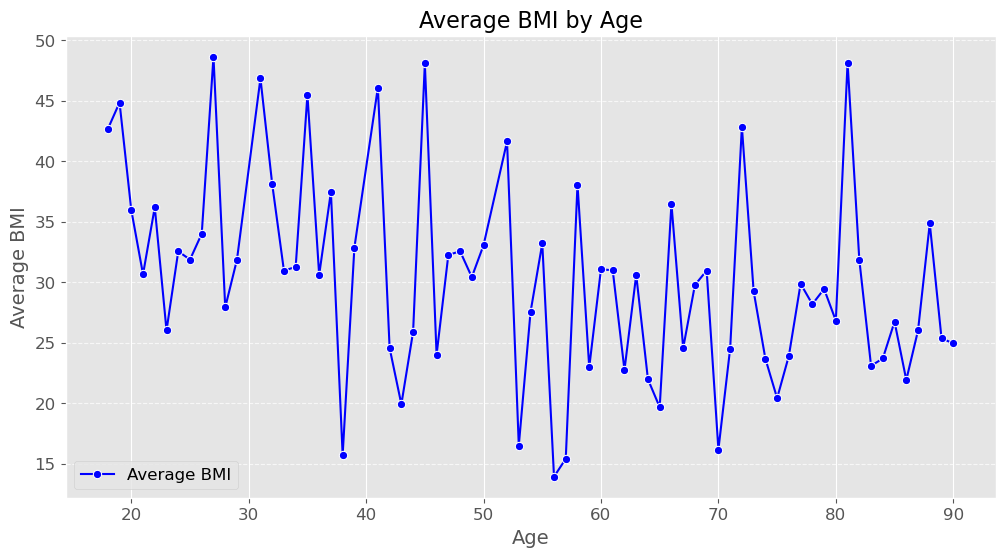

In [1745]:
plot_average_bmi_by_age(data)

This graph is particularly useful for identifying patterns and planning public health strategies :

If we notice that middle-aged individuals are more likely to have higher BMIs, we can design targeted programs to support this group. This might include workshops on healthy eating, exercise classes, or stress management techniques.

On the other hand, if we see that older adults tend to have lower BMIs, we can prioritize their nutritional care and health monitoring. This might involve home visits from healthcare professionals, meal delivery programs, or exercise classes tailored to their needs.
By exploring this relationship, we can gain a deeper understanding of the health needs of our community. This insight enables us to make informed decisions about how to allocate resources, design programs, and ultimately improve the health and well-being of our population.


## Distribution Of Plasma Glucose level


Managing blood sugar levels is crucial for people living with diabetes. When we see a trend of high blood sugar levels in a group, it can be a warning sign that many individuals may be at risk of developing metabolic disorders. By monitoring these levels, we can identify potential health issues early on and take steps to prevent or manage them. 

In [1749]:
def plot_plasmaglucose_levels(backscaled_df):
    """
    Plots a histogram of plasma glucose levels and calculates basic statistics.
    """
 
    # Plot the histogram
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    
    sns.histplot(data['plasma_glucose'], bins=30, color='blue', kde=True)  
    plt.title('Distribution of Plasma Glucose Levels')
    
    plt.xlabel('Plasma Glucose')
    plt.ylabel('Frequency')

    mean   = data['plasma_glucose'].mean()
    median = data['plasma_glucose'].median()
    std    = data['plasma_glucose'].std()

    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
    
    plt.legend()
    plt.savefig('Distribution_plasma_glucose_level.jpeg',dpi=400)
    plt.show()

    # Print the statistics
    print(f"Mean Plasma Glucose: {mean:.2f}")
    print(f"Median Plasma Glucose: {median:.2f}")
    print(f"Standard Deviation of Plasma Glucose: {std:.2f}")



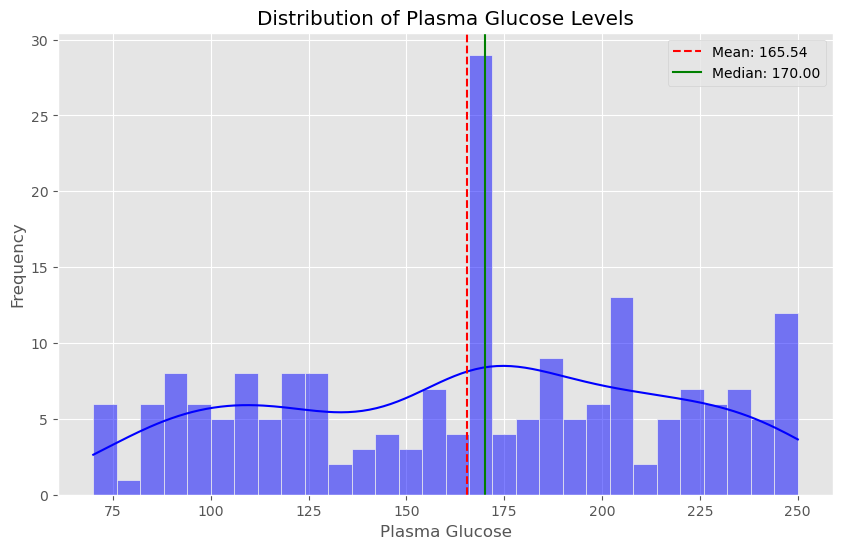

Mean Plasma Glucose: 165.54
Median Plasma Glucose: 170.00
Standard Deviation of Plasma Glucose: 50.69


In [1750]:
plot_plasmaglucose_levels(backscaled_df)

High-frequency bins represent the most common ranges of plasma glucose levels among individuals.
For instance, if most values fall between 80 and 120 mg/dL, this range represents the norm for the group.

The mean plasma glucose reflects the average glucose level.
The median glucose level helps identify the central tendency and is less affected by outliers compared to the mean.

If the histogram shows a normal distribution, most individuals have glucose levels around the mean, with fewer cases of low or high glucose.
If right-skewed, it indicates some individuals have abnormally high plasma glucose levels (possibly prediabetes or diabetes).

## Plots a histogram of the frequencies of plasma glucose with clustering centers overlaid

In [1753]:
def plot_plasma_glucose_hist(backscaled_df):
    """
    Plots a histogram of the frequencies of plasma glucose with clustering centers overlaid on the same graph.
    """
    
    plasma_glucose_value = data['plasma_glucose'].values.reshape(-1, 1)

    
    kmeans = KMeans(n_clusters=2, random_state=42)
    clusters = kmeans.fit_predict(plasma_glucose_value)

    
    data['Cluster'] = clusters
    plt.figure(figsize=(8, 6))
    sns.histplot(data['plasma_glucose'], bins=20, label='Plasma Glucose Distribution', color='blue')

    
    for i, centroid in enumerate(kmeans.cluster_centers_):
        plt.axvline(centroid[0], color=f'C{i}', linestyle='--', linewidth=2, label=f'Cluster {i+1} Centre: {centroid[0]:.2f}')

    
    plt.title('Distribution of Plasma Glucose with Clustering')
    plt.xlabel('Plasma Glucose')
    
    plt.ylabel('Frequency')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)    
    plt.show()
 

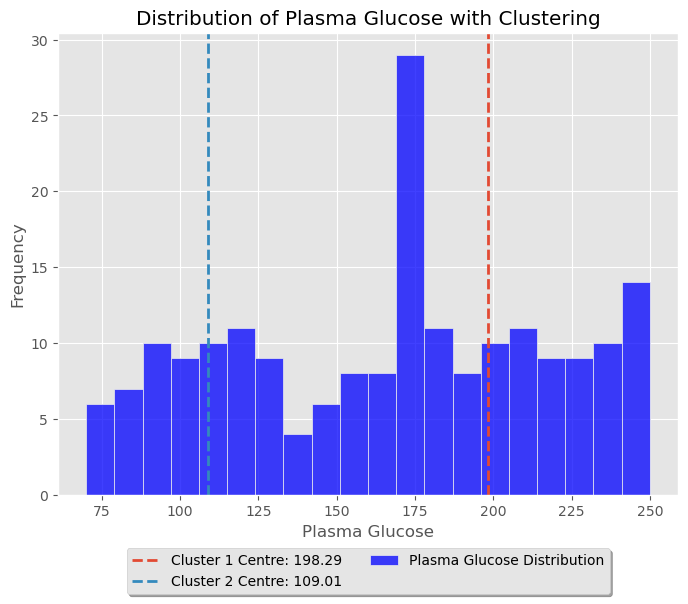

In [1754]:
plot_plasma_glucose_hist(backscaled_df)

Identified two distinct groups based on plasma glucose levels:

Cluster 1: Higher Risk(198.29)
These individuals have plasma glucose levels averaging around 198.29. This is a concern, as consistently high levels can increase the risk of developing diabetes or struggling with blood sugar control. It's essential for this group to work closely with their healthcare providers to manage their glucose levels.

Cluster 2: Lower Risk(109.01)
This group has plasma glucose levels averaging around 109.01, which is closer to the normal range. While it's still important for these individuals to maintain a healthy lifestyle, their glucose levels suggest a lower immediate risk of developing diabetes."

## Plots a histogram of the frequencies of plasma glucose with Linear Regression and Prediction 

In [1757]:
def plot_plasma_glucose_linear(backscaled_df):
    """
    Plots a histogram of the frequencies of plasma_glucose and a linear regression fit.
    """
    
    #  linear regression fitting 
    plasma_glucose_bins = np.histogram_bin_edges(data['plasma_glucose'], bins=20)   
    frequency, bin_edges = np.histogram(data['plasma_glucose'], bins=plasma_glucose_bins)   
    midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2  
    
    X_fit = midpoints.reshape(-1, 1)    
    y_fit = frequency
    
    regressor = LinearRegression()    
    regressor.fit(X_fit, y_fit)

    #Prediction
    y_pred = regressor.predict(X_fit)

  
    plt.figure(figsize=(8, 6)) 
    sns.histplot(data['plasma_glucose'], bins=20, label='plasma_glucose Distribution', color='blue')
    
    
    plt.plot(midpoints, y_pred,color='black', linewidth=2, label='Linear Regression ')

   
    plt.title('Distribution of Plasma Glucose Levels')
    plt.xlabel('plasma_glucose')
    
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.show()

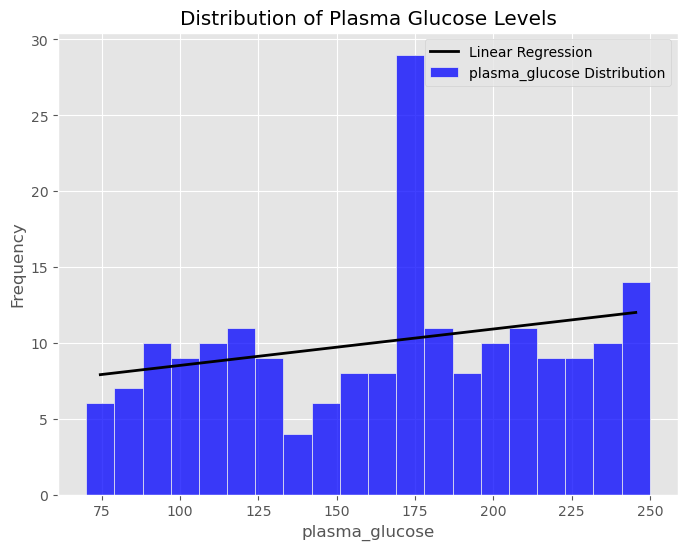

In [1758]:
plot_plasma_glucose_linear(backscaled_df)

As we examine the data, we notice a concerning trend. The regression line shows a slight upward slope, indicating that higher plasma glucose levels are becoming more frequent. This could mean that a significant number of individuals are struggling with elevated glucose levels, which is alarming from a medical perspective.

The High-Risk Zone

The right side of the histogram reveals a worrying pattern. The bars representing glucose levels between 200-250 indicate individuals with  high blood sugar. High glucose levels can lead to serious health issues.
The Healthy Zone

On the other hand, the left side of the graph shows individuals with normal plasma glucose levels, typically below 110. This reassuring sign indicates that these individuals have healthy glycemic control.

Predicting Future Health Risks:

If this trend continues, it may signal a growing risk of diabetes within the population. By incorporating additional factors like age, BMI, or insulin levels, we can refine our predictions and better estimate future health risks. This will enable us to take proactive steps to prevent or manage diabetes.

## Scatter Plot of Plasma Glucose Vs Diabetes Pedigree

A scatter plot is created to visualize the relationship between plasma glucose (x-axis) and diabetes pedigree (y-axis).
Each point in the plot represents the average diabetes pedigree for a specific plasma glucose level.
The relationship in the plot helps to investigate whether individuals with elevated plasma glucose also exhibit a higher genetic predisposition to diabetes.

In [1762]:
def plot_relational_graph_line(backscaled_df):
    """
    Creates a line plot showing the average diabetes_pedigree across different plasma_glucose levels.
    """          
    plasma_glucose_avg = data.groupby('plasma_glucose')['diabetes_pedigree'].mean().reset_index()

    plt.figure(figsize=(8, 6))

    # Scatter plot showing the relationship between plasma_glucose and the  diabetes_pedigree
    sns.scatterplot(x='plasma_glucose', y='diabetes_pedigree', data=plasma_glucose_avg, color='blue', marker='o')
    plt.title("Average Plasma Glucose vs. diabetes_pedigree", fontsize=14)
    
    plt.xlabel("Plasma Glucose", fontsize=12)
    plt.ylabel("Diabetes Pedigree", fontsize=12)
    
    plt.grid(True, linestyle='-', alpha=0.6)
    plt.tight_layout()
    
    
    plt.show()

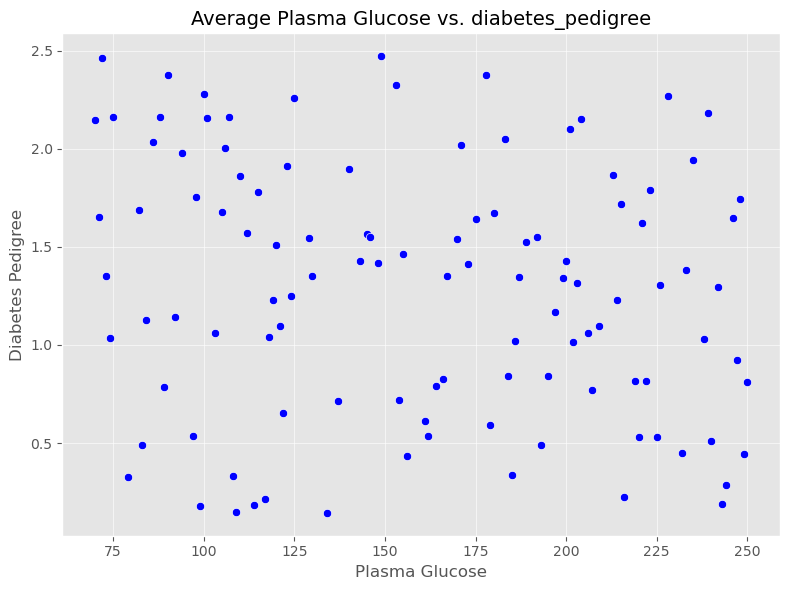

In [1763]:
plot_relational_graph_line(backscaled_df)

The connection shown in the plot allows us to explore if people with higher plasma glucose levels are also more likely to have a genetic tendency towards diabetes. This relationship could help us understand how our biology and lifestyle choices interact in the context of diabetes risk. By examining this, we can gain insights into how genetics might influence our health and the importance of monitoring glucose levels for prevention.

## Relational Graph for Clustering 

Plasma Glucose (X):
 Elevated plasma glucose levels indicate impaired glucose metabolism, often leading to diabetes or prediabetes.
 
Diabetes Pedigree (Y):
 A higher diabetes pedigree score suggests a strong genetic association with diabetes.
 
By interpreting the scatter plot and clustering, healthcare professionals can better understand how genetic predisposition and glucose metabolism interact to influence diabetes risk.

In [1767]:
def plot_plasma_scatter(backscaled_df):
    """
    Creates a scatter plot based on plasma Glucose vs. Diabetes Pedigree, 
    also includes clustering
    """
    # Plotting scatter
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data,  x='plasma_glucose', y='diabetes_pedigree', hue='plasma_glucose', palette='viridis',alpha=0.9)
    plt.title('Scatter Plot of Plasma Glucose vs Daibetes Pedegree')
    
    plt.xlabel('Plasma Glucose')
    plt.ylabel('diabetes_pedigree')
    plt.legend(title='plasma_glucose', loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)

    # Clustering: using K-Means
    X = data[['plasma_glucose', 'diabetes_pedigree']].dropna().values  
    kmeans = KMeans(n_clusters=3, random_state=32)
    data['Cluster'] = kmeans.fit_predict(X)
    
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], s=100, c='black', marker='X', label='Cluster Centers')

    
    plt.show()


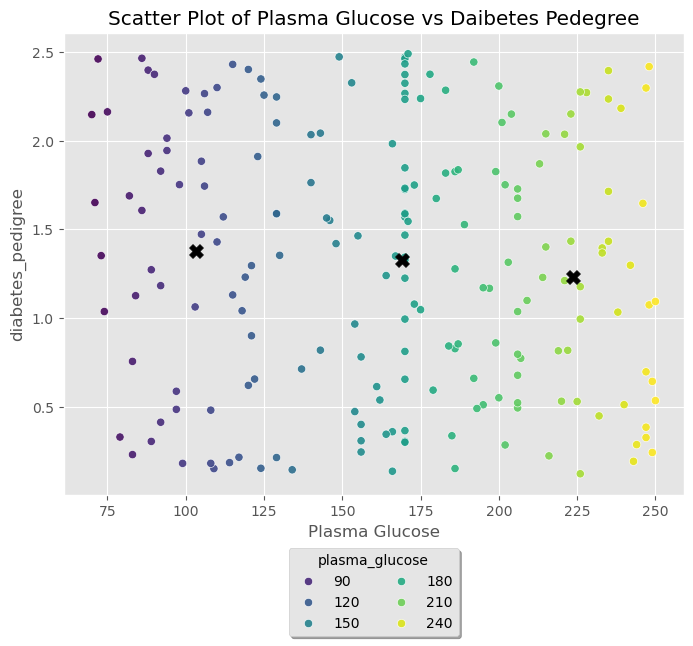

In [1768]:
plot_plasma_scatter(backscaled_df)

Cluster 1: Low plasma glucose levels with varying diabetes pedigree scores.
Cluster 2: Moderate plasma glucose levels.
Cluster 3: High plasma glucose levels.
High blood sugar levels can be a sign of diabetes or prediabetes. Individuals in the high-glucose cluster (rightmost cluster) should be monitored closely.
The scatter points are color-based on plasma glucose levels, with darker colors representing lower glucose levels and lighter colors representing higher levels.
Darker Colors(purple): Represent lower values of plasma glucose, such as 90.
Lighter Colors(yellow): Represent higher values of plasma glucose, such as 240.

## Plasma Glucose Vs Diabetes Pedigree

In [1771]:
def plot_linear_scatter(backscaled_df):
    """
    Creates a scatter plot based on plasma Glucose vs. Diabetes Pedigree, 
    also includes Fitting function
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='plasma_glucose', y='diabetes_pedigree', hue='plasma_glucose',  palette='viridis',  alpha=0.9)
    
    plt.title('Scatter Plot of plasma Glucose vs Diabetes Pedigree')
    plt.xlabel('Plasma Glucose')
    plt.ylabel('Diabetes Pedigree')
    
    # Fitting
    model = LinearRegression()
    X_fit = data['plasma_glucose'].dropna().values.reshape(-1, 1)
    y_fit = data['diabetes_pedigree'].dropna().values
    model.fit(X_fit, y_fit)

    # Predicted values for the regression line
    y_pred = model.predict(X_fit)

    # Plot regression line
    plt.plot(data['plasma_glucose'].dropna(), y_pred, color='red', linewidth=2, label='Regression Line')
    plt.legend(title='Plasma Glucose', loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)

    
    plt.show()

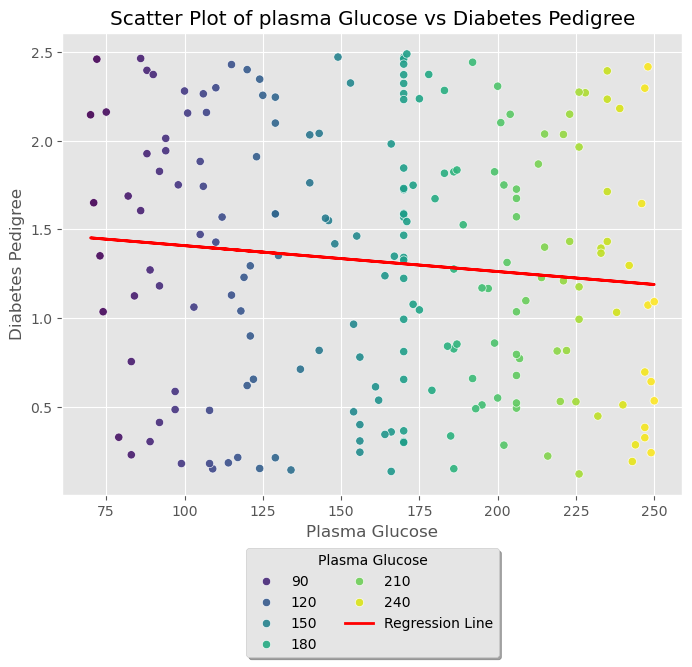

In [1772]:
plot_linear_scatter(backscaled_df)

The diabetes pedigree function shows how likely a person is to develop diabetes based on their family history and genetics. In simple terms, linear regression helps us see if people with higher blood sugar levels (plasma glucose) are also more likely to have a higher genetic risk of diabetes.

. In simple terms, people with higher blood sugar levels might have a greater risk of developing diabetes, especially if they also have a strong family history of the condition.

## Correlation heatmap for numeric features with clustering and fitting

In [1775]:
def plot_statistical_graph_heatmap(backscaled_df):
    """
    Plot of correlation matrix with selected columns.
    """
    
    # Selected columns for the correlation matrix to get a clear visual
    selected_columns = ['age', 'diabetes_pedigree', 'blood_pressure', 'plasma_glucose', 
                        'max_heart_rate', 'bmi', 'insulin']
    
    
    numerical_data = data[selected_columns].select_dtypes(include=['float64', 'int64'])
    corr_matrix = numerical_data.corr()

    #plotting
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, cmap='PRGn', annot=True, fmt='.2f', square=True)

    plt.title("Correlation Matrix Heatmap", fontsize=14)
    plt.tight_layout()

    
    plt.show()



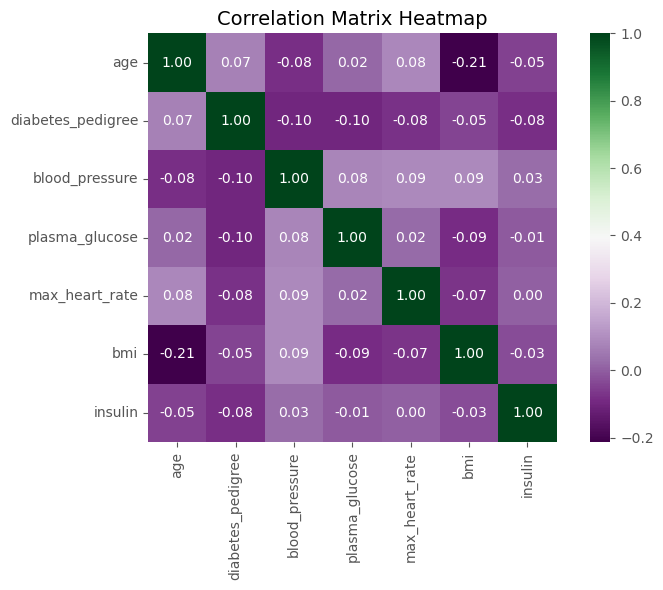

In [1776]:
plot_statistical_graph_heatmap(backscaled_df)

## Clustering Plasma vs Insuline

In [1778]:
def plot_cluster_plasmavsinsuline(plot_statistical_graph_heatmap):

    """
    clustering
    """
    X = data[['plasma_glucose', 'insulin']].dropna().values
    kmeans = KMeans(n_clusters=2, random_state=32)
    data['Cluster'] = kmeans.fit_predict(X)

    
    centers = kmeans.cluster_centers_
    plt.figure(figsize=(8, 6))
    
    plt.scatter(X[:, 0],X[:, 1], c=data['Cluster'], cmap='coolwarm', alpha=1, label='Clusters')
    plt.scatter(centers[:, 0], centers[:, 1],s=100, c='black',marker='X',label='Cluster Centers')
    
    plt.xlabel('Plasma Glucose')
    plt.ylabel('Insulin')
    
    plt.title(' Clustering on Plasma vs Insulin')
    plt.legend( loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)

  
    plt.show()

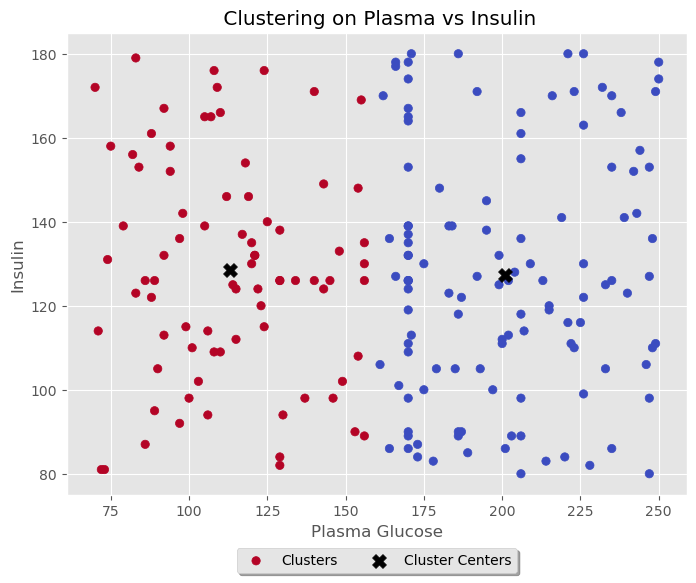

In [1779]:
 plot_cluster_plasmavsinsuline(plot_statistical_graph_heatmap)

## Linear R on Plasma vs Linear R

In [1781]:
def plot_linear_plasma_vs_insuline(plot_statistical_graph_heatmap):
    """
    Linear and Prediction
    """

    # Linear Regression Fitting
    model = LinearRegression()
    X_fit = data['plasma_glucose'].values.reshape(-1, 1)
    y_fit = data['insulin'].values
    model.fit(X_fit, y_fit)
    y_pred = model.predict(X_fit)

    # Scatter plot with regression line
    plt.figure(figsize=(6, 6))
    plt.scatter(data['plasma_glucose'], data['insulin'], alpha=0.8, label='Data Points',color='skyblue')
    
    plt.plot(data['plasma_glucose'], y_pred, color='red', linewidth=2, label='Regression Line')
    
    plt.xlabel('plasma_glucose')
    plt.ylabel('insulin')
    
    plt.title('Linear.R  Plasma vs Insulin')
    plt.legend( loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
    
    plt.show()

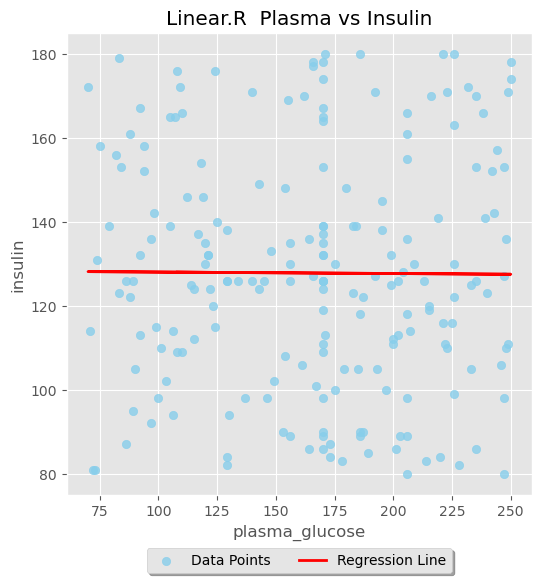

In [1782]:
plot_linear_plasma_vs_insuline(plot_statistical_graph_heatmap)

## Elbow Plot & Silhouette Score

In [1784]:
def perform_clustering_and_plot(data):
    """
    Elbow Plotting & Silhouette Score 
    
    """
    data = data[['plasma_glucose', 'bmi']]
    # Normalize the data
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)

    # Initialize lists for WCSS and Silhouette Scores
    wcss = []
    silhouette_scores = []
    k_values = range(2, 11)  

    # Perform clustering for each value of k
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(normalized_data)
        
        # WCSS  for elbow method
        wcss.append(kmeans.inertia_)
        
        # Silhouette Score
        silhouette_avg = silhouette_score(normalized_data, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

   
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    
    plt.plot(k_values, wcss, marker='o', color='red')
    plt.title('Elbow Method')
    
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')

    # Silhouette Score Plot
    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, marker='o', color='green')
    
    plt.title('Silhouette Scores')
    plt.xlabel('Number of Clusters (k)')
    
    plt.ylabel('Silhouette Score')
    plt.tight_layout()

     
    plt.show()

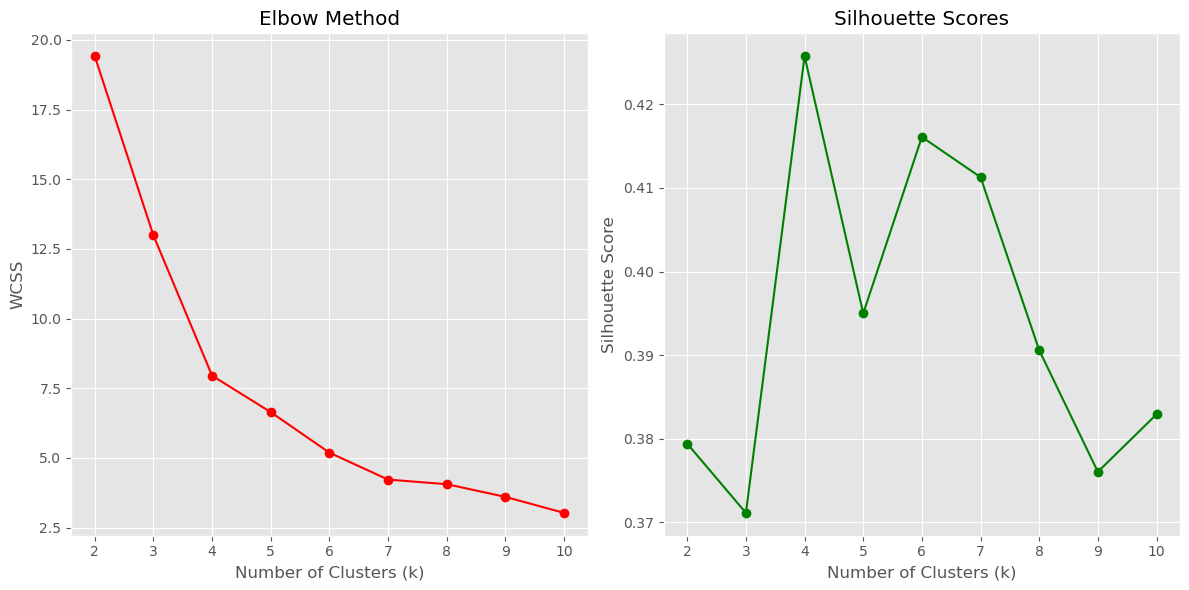

In [1785]:
perform_clustering_and_plot(data)

##  Clustering on Plasma Glucose and BMI

In [1787]:
def clusteing_silhouette( backscaled_df):
    """
    Clustering Silhouette and Ploting
    """
    X = data[['plasma_glucose', 'bmi']].dropna()
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    X['Cluster'] = kmeans.fit_predict(X)

    # Scatter plot for clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X['plasma_glucose'], X['bmi'], c=X['Cluster'], cmap='viridis', alpha=0.7,label='Clusters')
    
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=100, c='black', marker='X', label='Cluster Centers')
    plt.title('K-Means Plasma vs BMI', fontsize=14)
    
    plt.xlabel('Plasma Glucose', fontsize=12)
    plt.ylabel('BMI', fontsize=12)
    
    plt.legend( loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
    plt.show()

   

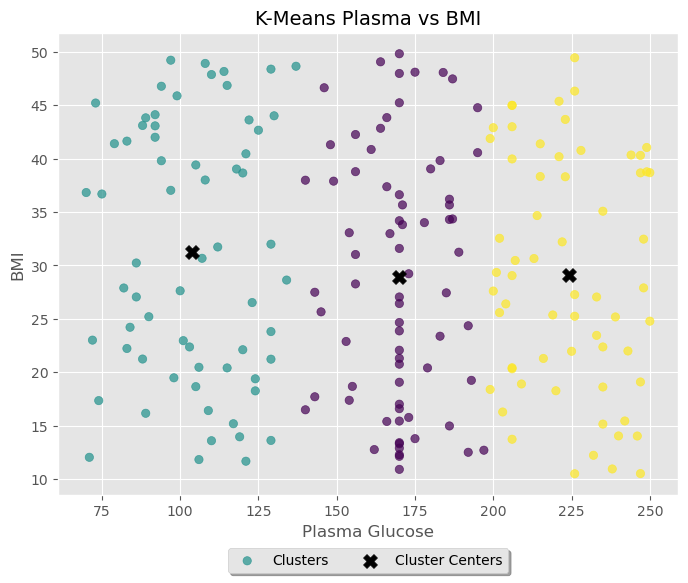

In [1788]:
clusteing_silhouette( backscaled_df)

## Fitting On Plasma Glucose and BMI

In [1790]:
 def linear_silhouette( backscaled_df):
     """
     Plottig Linear using silhouette
     
     """
     X = data[['plasma_glucose', 'bmi']].dropna()
     model = LinearRegression()
     
     X_fit = X['plasma_glucose'].values.reshape(-1, 1)  # Independent variable
     y_fit = X['bmi'].values
    
     model.fit(X_fit, y_fit)
     y_pred = model.predict(X_fit)

    # Scatter plot with regression line
     plt.figure(figsize=(8, 6))
     plt.scatter(X['plasma_glucose'], X['bmi'], alpha=0.8, label='Data Points', color='orange')
     
     plt.plot(X['plasma_glucose'], y_pred, color='red', linewidth=2, label='Regression Line')
     plt.title('Plasma Glucose vs BMI', fontsize=14)
     
     plt.xlabel('Plasma Glucose', fontsize=12)
     plt.ylabel('BMI', fontsize=12)
     
     plt.legend( loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
     plt.show()

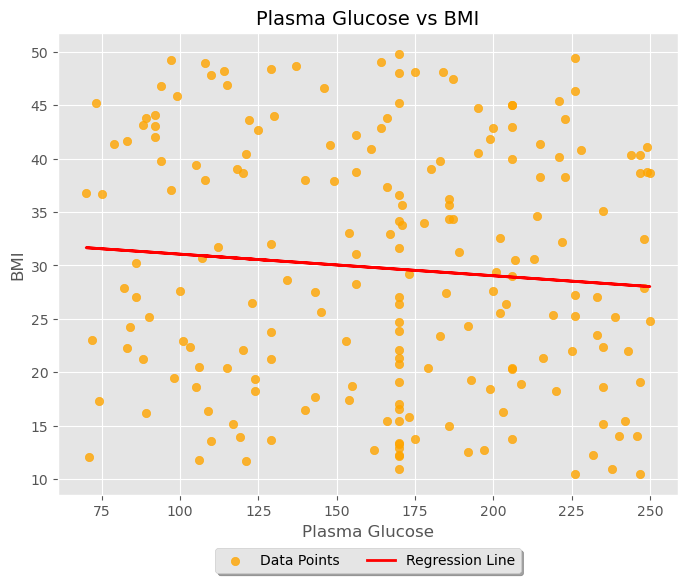

In [1791]:
linear_silhouette( backscaled_df)

 There is a positive correlation between plasma glucose levels and BMI. In other words, as BMI increases, plasma glucose levels tend to increase as well.

## Conclusion